# dsei2100s23hw1p6-Bayes-Error
Classification of 1-D data and Bayes Error

## HW1 P6: Classification of 1-D data and Bayes Error

Suppose we have two populations of beans. The weights of these beans are normaly distributed, so if $\mu$ is the mean weight of one type of beans beans and $\sigma$ is the standard deviation, so that means that the probabilty density is given by 
    
$$p_{\mu,\sigma}(x)$ = $\frac{1}{\sigma \sqrt{2\pi}}$ $e^{-\frac{1}{2\sigma}(x-\mu)^2}$$

and then the probabilty of measureing a weight in interval $I=[x_1,x_2]$ of bean of that type is given by

$$ P_{\mu,\sigma}(I) = \int^{x_2}_{x_1} p_{\mu,\sigma}(x) dx $$

The mean weight of bean type A, $\mu_A$ is 5 grams and the standard deviation, $\sigma_A$, is 2. The mean weight of bean type B, $mu_B$, is 4 grams and has a standard deviation $\sigma_B$, of  1.4.

Our classifier $C_T(x)$ is determined by a weight threshold $T$:

$$f_T(x) = -1 \mbox{ if } x \leq T $$

$$f_T(x) = 1  \mbox{ if } T < x  .$$

The [*Bayes error*](https://en.wikipedia.org/wiki/Bayes_error_rate) is the probability that we will misclassify. Assume  that there are equally many beans of each type (no prior).

### part-A:
For a given T write down the theoretical expression (in terms of integrals) for the probability that you will classify a point as bean type A when it is bean type B and similarly that it is bean type B when it is bean type A.

Suppose $C_{T,A}$ is misclassification rates of the classifier $C_T$ for beans of type A and $C_{T,B}$ to be the misclassification rates of the classifier $C_T$ for beans of type B.

$C_{T,A}$ can be expressed as the probability that a bean of type A will be classified as Type B, given by:

$$C_{T,A} = P_{\mu_A,\sigma_A}(x \leq T) = \int_{-\infty}^T p_{\mu_A,\sigma_A}(x) dx = \int_{-\infty}^T  \frac{1}{\sigma_A \sqrt{2\pi}} e^{-\frac{1}{2\sigma_A}(x-\mu_A)^2} dx$$

Same as avobe $C_{T,B}$ can be expressed as the probability that a bean of type B will be classified as type A, given by:

$$C_{T,B} = P_{\mu_B,\sigma_B}(x > T) = \int_T^{\infty} p_{\mu_B,\sigma_B}(x) dx = \int_T^{\infty} \frac{1}{\sigma_B \sqrt{2\pi}} e^{-\frac{1}{2\sigma_B}(x-\mu_B)^2} dx$$

As both bean types are equally likely, the total misclassification rate is indicated by:

$$C_T = \frac{1}{2}(C_{T,A} + C_{T,B})$$

### Part-B:
In python just using numerical functions (you can take 1000 data points from min of weight x=1 to x=8) compute the theorical probailities from part a. Use matplotlib to make a curves showing the probability of classifying something class A ($\hat{C}=A$ )assuming it is really class B $C=B$, in other words $P(\hat{C}=A| C=B)$ is the figure y-axis, as a function of $T$, the figure x-axis. Similarly plot $P(\hat{C}=B| C=A)$ as a fucntion of $T$. Putting these together since $P(A)=P(B)=1/2$, adding the curves and dividing by 2 you get the probability of miss-classification or Bayes error as a function of $T$. Plot that as well. 

In [27]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [20]:
#Misclssification using Cumulative distribution function

def C_A(T, mu, sigma):
    return norm.cdf(T, mu, sigma)

def C_B(T, mu, sigma):
    return 1 - norm.cdf(T, mu, sigma)

def C_T(T, mu_A, sigma_A, mu_B, sigma_B):
    return 0.5 * (C_A(T, mu_A, sigma_A) + C_B(T, mu_B, sigma_B))

In [21]:
# Given Parameters
mu_A = 5
sigma_A = 2
mu_B = 4
sigma_B = 1.4

In [22]:
# Computing the values of T
T = np.linspace(1, 8, 1000)

In [25]:
# Computing the probabilities of misclassification
P_A_B = C_A(T, mu_B, sigma_B)
P_B_A = C_B(T, mu_A, sigma_A)
P_error = 0.5 * (P_A_B + P_B_A)

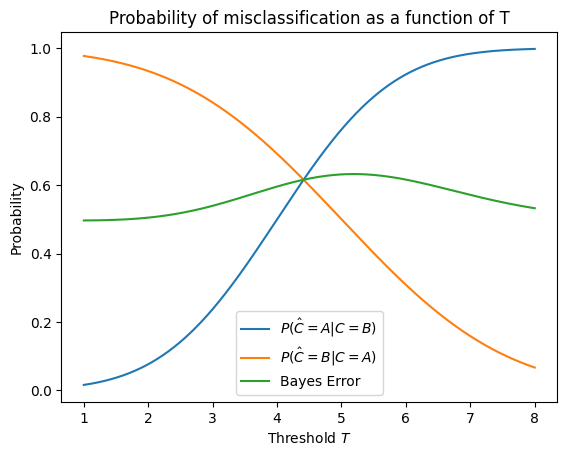

In [31]:
# Plot the results
plt.plot(T, P_A_B, label='$P(\\hat{C}=A|C=B)$')
plt.plot(T, P_B_A, label='$P(\\hat{C}=B|C=A)$')
plt.plot(T, P_error, label='Bayes Error')

plt.xlabel('Threshold $T$')
plt.ylabel('Probability')
plt.title('Probability of misclassification as a function of T')
plt.legend()
plt.show()

In [ ]:
c. Use the numpy random.randn to simulate 10000 data points, 5,000 from bean type A and 5,000 from bean type B. You can now pick 1000 values of $T$ using linspace between $T=1$ and $T=8$. For each of these you can compute the miss classification rate. Make the figure. These should match closely your results for $b$ above.